# Importing the necessary libraries 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os 

# Loading the dataset

In [50]:
data = pd.read_csv('C:\\Users\\nuzha\\Desktop\\Result_Auto_Prova.csv')

In [51]:
# Displaying the first 5 rows of the dataset
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,9.370370,low,0,1
1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,9.370370,low,0,1
2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500,12.368421,9.730769,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950,9.791667,8.433333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450,13.055556,11.500000,low,0,1


The dataset has multiple columns as can be seen from the table above. For my clustering purpose, I am focusing on "city-mpg" and "price" as they are relevant to my analysis on fuel efficiency and cost.

# Pre-processing and cleaning the data

In [52]:
# Extracting the target features
features = data[["city-mpg", "price"]]

In [53]:
# Checking for missing values
missing_values = features.isnull().sum()

In [54]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
missing_values

city-mpg    0
price       0
dtype: int64

The features "city-mpg" and "price" do not have any missing values and the data has been successfully scaled to ensure that each feature has equal importance during clustering. 

# Part-1: K-Means Clustering

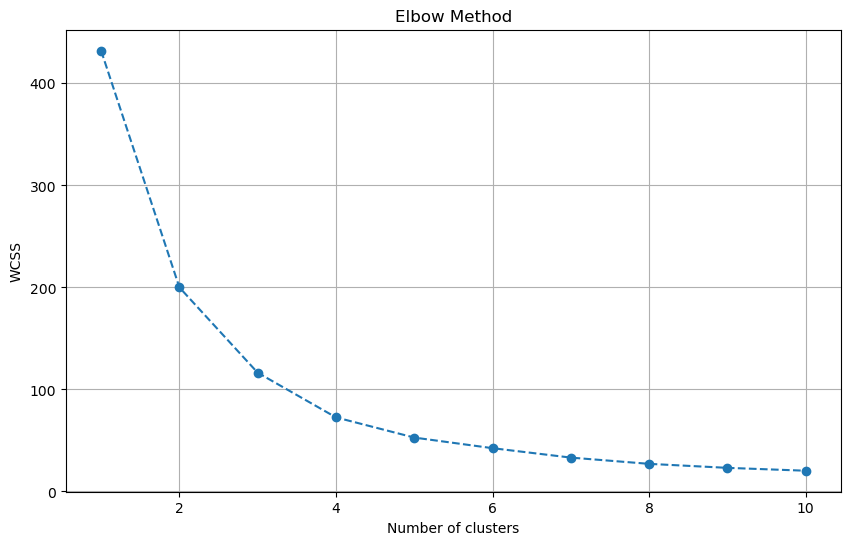

In [55]:
import warnings
warnings.filterwarnings("ignore")

# Determining the optimal number of clusters using the Elbow method
wcss = []  
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

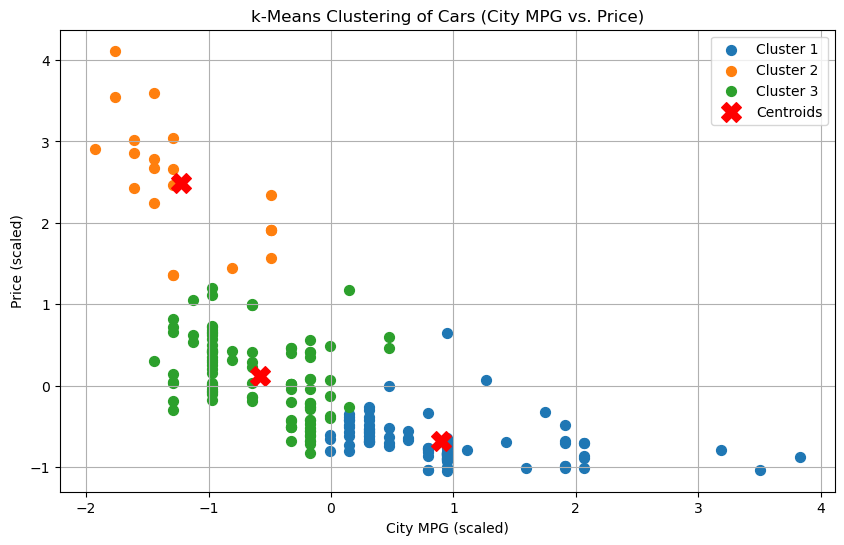

In [56]:
# Fitting k-Means clustering algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clustered = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[clustered == 0, 0], scaled_features[clustered == 0, 1], s=50, label='Cluster 1')
plt.scatter(scaled_features[clustered == 1, 0], scaled_features[clustered == 1, 1], s=50, label='Cluster 2')
plt.scatter(scaled_features[clustered == 2, 0], scaled_features[clustered == 2, 1], s=50, label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('k-Means Clustering of Cars (City MPG vs. Price)')
plt.xlabel('City MPG (scaled)')
plt.ylabel('Price (scaled)')
plt.legend()
plt.grid(True)
plt.show()

Above is the k-Means clustering result for cars based on "City MPG" and "Price":

Cluster 1 (Blue): Cars in this cluster have higher fuel efficiency (City MPG) and are generally lower in price. These could be interpreted as the "most fuel-efficient and least expensive" cars.

Cluster 2 (Green): Cars in this cluster have moderate fuel efficiency and are priced in the mid-range. These are the "moderately fuel-efficient and moderately priced" cars.

Cluster 3 (Orange): Cars in this cluster have lower fuel efficiency and higher in price. These can be seen as the "less fuel-efficient and more expensive" cars.

The Red cross markers indicate the centroids of the clusters.

# Part 2: Hierarchical Clustering

Hierarchical clustering is a method of clustering where data points are grouped based on a bottom-up approach, starting with individual points and merging them into larger clusters. To determine the optimal number of clusters for hierarchical clustering, I am using a dendrogram. The dendrogram visually represents the arrangement of the clusters produced by the hierarchical clustering.

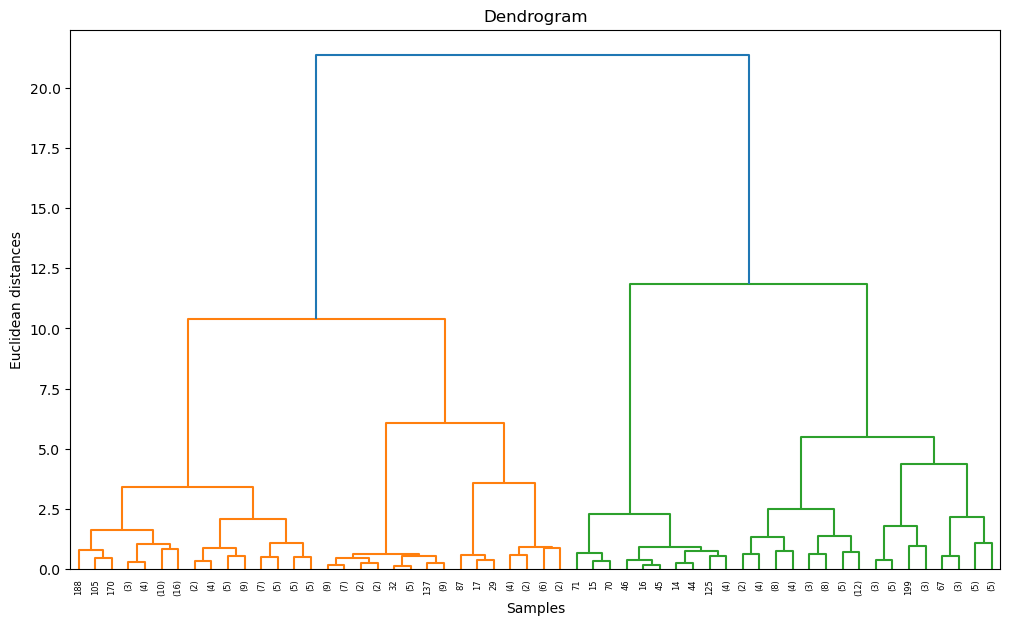

In [57]:
# Generating linkage matrix
linked = linkage(scaled_features, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=5)  
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

The dendrogram represents the hierarchical structure of the data. Each vertical line is a cluster merging, and the height of these lines indicates the distance at which the merging occurred. From the dendrogram, if I cut the tallest vertical line (without crossing t-color horizontal lines), I found three distinct clusters consistent with my earlier k-Means clustering. Now, using the optimal number of clusters determined from the dendrogram, I'll perform Agglomerative hierarchical clustering and visualize the results.

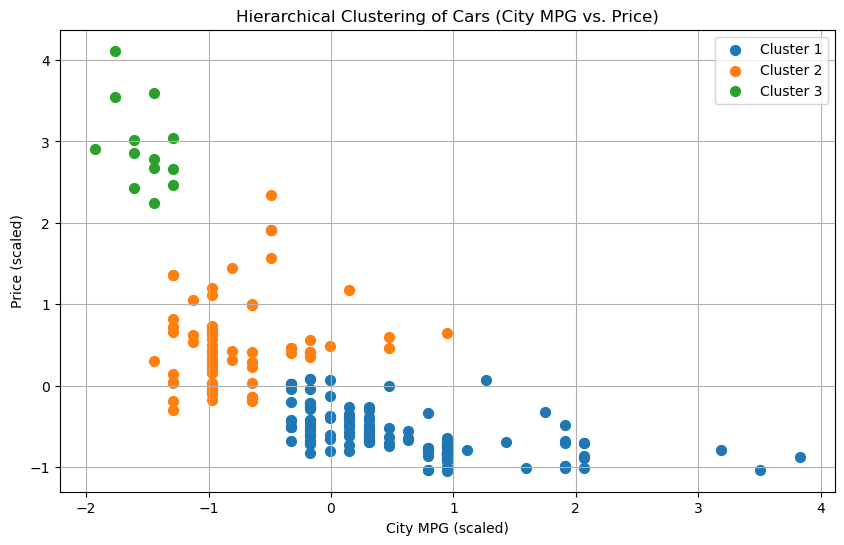

In [58]:
# Performing hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hier_clus = hierarchical.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[hier_clus == 0, 0], scaled_features[hier_clus == 0, 1], s=50, label='Cluster 1')
plt.scatter(scaled_features[hier_clus == 1, 0], scaled_features[hier_clus == 1, 1], s=50, label='Cluster 2')
plt.scatter(scaled_features[hier_clus == 2, 0], scaled_features[hier_clus == 2, 1], s=50, label='Cluster 3')
plt.title('Hierarchical Clustering of Cars (City MPG vs. Price)')
plt.xlabel('City MPG (scaled)')
plt.ylabel('Price (scaled)')
plt.legend()
plt.grid(True)
plt.show()

The above plot shows the result of the Hierarchical Clustering for cars based on "City MPG" and "Price":

Cluster 1 (Blue): Cars in this cluster have higher fuel efficiency (City MPG) and lower in price. This is analogous to the "most fuel-efficient and least expensive" category we identified in k-Means clustering.

Cluster 2 (Orange): Cars in this cluster have moderate fuel efficiency and are priced in the mid-range. This corresponds to the "moderately fuel-efficient and moderately priced" category.

Cluster 3 (Green): Cars in this cluster have lower fuel efficiency and higher in price. This aligns with the "less fuel-efficient and more expensive" category.

The clusters from the Hierarchical Clustering aligns well with those from the k-Means clustering.

# Part 3: Evaluation and Comparison

I am using the silhouette score as a metric to evaluate the quality of the clusters formed. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Now, I am going to compute the silhouette scores for both k-Means and Hierarchical clustering methods.

In [59]:
# Computing silhouette scores
kmeans_silhouette = silhouette_score(scaled_features, clustered)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_clusters)
kmeans_silhouette, hierarchical_silhouette

(0.4780724770466279, 0.4857303026523312)

### The silhouette scores for the clustering methods are as follows:
k-Means Clustering: 0.478 and Hierarchical Clustering: 0.486. Both scores are relatively close which indicate that the clusters are reasonably well-separated and cohesive. The slightly higher score for Hierarchical Clustering suggests that its clusters are marginally better defined in terms of cohesion and separation compared to k-Means, but the difference is minimal.

### Comparison between k-Means Clustering and Hierarchical Clustering:
k-Means Clustering: Pros: It's computationally faster for larger datasets and can produce tighter clusters. Cons: The number of clusters need to be specified beforehand, and the results can vary based on the initial placement of centroids. Hierarchical Clustering: Pros: It provides a dendrogram, which can be useful for understanding the data's hierarchical structure and doesn't require specifying the number of clusters upfront. Cons: It's computationally intensive for larger datasets.

### Comparison based on results:
Both clustering methods produced relatively similar clusters for the car dataset based on "City MPG" and "Price". The three clusters broadly represent cars that are "most fuel-efficient and least expensive", "moderately fuel-efficient and moderately priced", and "less fuel-efficient and more expensive". The slight difference in silhouette scores suggests that Hierarchical Clustering's clusters are marginally better defined but the distinction is minimal.

### Conclusion:
Both methods provided meaningful insights into the dataset. The choice between them would depend on the dataset size, the importance of understanding hierarchical relationships, and whether the number of clusters is known beforehand.